In [13]:
import requests

url = "https://home.kpmg/search/?all_sites=false&i=1&language=zh&page=3&q=&q1=All&q10=All&q11=All&q12=All&q13=All&q2=Press+Release&q3=article-details-template|insights-flexible-template|editable-flex-template|editable-campaign-template&q4=All&q5=All&q6=All&q7=All&q8=All&q9=All&rank=rank_cn_zh&site=cn_zh&sort=KPMG_Filter_Date&sp_c=20&sp_dedupe_field=KPMG_Document_ID&sp_k=cn_zh&x1=KPMG_Tab_Type&x10=KPMG_Filter_Year&x11=KPMG_Market_Path&x12=KPMG_Ser_Path_Loc_pa&x13=KPMG_Topic_Path_pa&x2=KPMG_Article_Type&x3=KPMG_Template_Type&x4=KPMG_Cont_Mem_Firm&x5=KPMG_Geo_Rel_Path&x6=KPMG_Ind_Path_Loc_pa&x7=KPMG_Topic_Path&x8=KPMG_Cont_Type_Path&x9=KPMG_Insights_Path"
headers = {
    "accept": "application/json, text/javascript, */*; q=0.01",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7",
    "cache-control": "no-cache",
#     "cookie": "sat_track=true; gig_bootstrap_3_RaBrzznC_MTxoPM3J3haLwEejwsYEvWdirKz8LXidCo-n8jqk_56-otIPv13t3Bu=login_ver3",
    "dnt": "1",
    "pragma": "no-cache",
    "referer": "https://home.kpmg/cn/zh/home/news-media/press-releases.html",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36",
    "x-requested-with": "XMLHttpRequest"
}
res = requests.get(url, headers=headers)
# 403状态码可能是h2协议
print(res.status_code)
# print(res.json())

403


In [ ]:
s = "您现在的位置：首页 > 民生 > 科创 > "
print(s.split())

In [2]:
import re

url = "https://zdreview.com/wp-content/uploads/2020/07/2020072717355018.png"
p = re.compile(r'(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})')
res = p.findall(url)
print(res[0])

[('2020', '07', '27'), ('1735', '50', '18')]


In [3]:
s = 'mspoweruser'
print(len(s))

11


In [ ]:
import requests
url = "https://home.kpmg/search/?all_sites=false&i=1&language=zh&page=3&q=&q1=All&q10=All&q11=All&q12=All&q13=All&q2=Press+Release&q3=article-details-template|insights-flexible-template|editable-flex-template|editable-campaign-template&q4=All&q5=All&q6=All&q7=All&q8=All&q9=All&rank=rank_cn_zh&site=cn_zh&sort=KPMG_Filter_Date&sp_c=20&sp_dedupe_field=KPMG_Document_ID&sp_k=cn_zh&x1=KPMG_Tab_Type&x10=KPMG_Filter_Year&x11=KPMG_Market_Path&x12=KPMG_Ser_Path_Loc_pa&x13=KPMG_Topic_Path_pa&x2=KPMG_Article_Type&x3=KPMG_Template_Type&x4=KPMG_Cont_Mem_Firm&x5=KPMG_Geo_Rel_Path&x6=KPMG_Ind_Path_Loc_pa&x7=KPMG_Topic_Path&x8=KPMG_Cont_Type_Path&x9=KPMG_Insights_Path"

res = requests.get(url)
print(res.text)

In [ ]:
import requests

url = "https://finance.yahoo.com/_finance_doubledown/api/resource?bkt=fd-hstrm2-rc3&crumb=o6irUKrCxf0&device=desktop&ecma=modern&feature=adsMigration%2CcanvassOffnet%2CccOnMute%2Cdebouncesearch100%2CdeferDarla%2CemptyServiceWorker%2CenableCCPAFooter%2CenableCMP%2CenableConsentData%2CenableFeatureTours%2CenableFinancialsTemplate%2CenableFreeFinRichSearch%2CenableGuceJs%2CenableGuceJsOverlay%2CenableNavFeatureCue%2CenableNewResearchInsights%2CenablePfSummaryForEveryone%2CenablePremiumSingleCTA%2CenablePremiumScreeners%2CenablePrivacyUpdate%2CenableStreamDebounce%2CenableTheming%2CenableUpgradeLeafPage%2CenableVideoURL%2CenableYahooSans%2CenableYodleeErrorMsgCriOS%2CncpListStream%2CncpPortfolioStream%2CncpQspStream%2CncpStream%2CncpStreamIntl%2CncpTopicStream%2CnewContentAttribution%2CnewLogo%2CoathPlayer%2CoptimizeSearch%2CrelatedVideoFeature%2CreportReactMarkupDiff%2CthreeAmigos%2CwaferHeader%2CvideoNativePlaylist%2CdisableCommentsMessage%2Clivecoverage%2CdarlaFirstRenderingVisible%2CenableTradeit%2CdisableTrading%2CenableFeatureBar%2CenableSearchEnhancement%2CenableUserSentiment%2CenableBankrateWidget%2CncpHpStream%2CmabHpStream%2CcanvassReplies%2CenablePremiumFinancials%2CenableInstapage%2CenableNewResearchFilterMW%2CenableSingleRail%2CshowMorningStar%2CenableYodlee%2CenableReportDetail%2CenhanceAddToWL%2CsponsoredAds%2CenableStageAds%2CenableTradeItLinkBrokerSecondaryPromo%2CpremiumPromoHeader%2CenableQspPremiumPromoSmall%2CclientDelayNone%2CthreeAmigosMabEnabled%2CthreeAmigosAdsEnabledAndStreamIndex0%2CenableRelatedTickers%2CenableNotification%2CstreamBucketIdRS1&intl=us&lang=en-US&partner=none&prid=3nj5vehfj9r2c&region=US&site=finance&tz=Asia%2FShanghai&ver=0.102.3864"

headers = {
    "accept": "*/*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7",
    "cache-control": "no-cache",
    "content-length": "17824",
    "content-type": "application/json",
    "cookie": "B=4koujc9fj9r2c&b=3&s=ns; GUC=AQEBAQFfNj1fPkIg5ASa; A1=d=AQABBEzsNF8CEKp4ZWhZo2UqT9aF_2LTY0oFEgEBAQE9Nl8-XwAAAAAA_SMAAAcITOw0X2LTY0o&S=AQAAAjQz-wfH7kOLKP9b0hbI5zc; A3=d=AQABBEzsNF8CEKp4ZWhZo2UqT9aF_2LTY0oFEgEBAQE9Nl8-XwAAAAAA_SMAAAcITOw0X2LTY0o&S=AQAAAjQz-wfH7kOLKP9b0hbI5zc; A1S=d=AQABBEzsNF8CEKp4ZWhZo2UqT9aF_2LTY0oFEgEBAQE9Nl8-XwAAAAAA_SMAAAcITOw0X2LTY0o&S=AQAAAjQz-wfH7kOLKP9b0hbI5zc&j=WORLD; cmp=t=1597303893&j=0",
    "dnt": "1",
    "origin": "https://finance.yahoo.com",
    "pragma": "no-cache",
    "referer": "https://finance.yahoo.com/",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36",
    "x-requested-with": "XMLHttpRequest"
}
data = '{"requests":{"g0":{"resource":"StreamService","operation":"read","params":{"ui":{"comments_offnet":true,"dispatch_content_store":true,"editorial_featured_count":1,"image_quality_override":true,"link_out_allowed":true,"ntk_bypassA3c":true,"pubtime_maxage":0,"relative_links":true,"show_comment_count":true,"smart_crop":true,"storyline_count":2,"storyline_enabled":true,"storyline_min":2,"summary":true,"thumbnail_size":100,"tiles":{"allowPartialRows":true,"doubleTallStart":0,"featured_label":false,"gradient":false,"height":175,"resizeImages":false,"textOnly":[{"backgroundColor":"#fff","foregroundColor":"#000"}],"width_max":300,"width_min":200},"view":"mega","editorial_content_count":0,"editorial_content_min":0,"enable_lead_fallback_image":true},"forceJpg":true,"releasesParams":{"limit":20,"offset":0},"ncpParams":{"query":{"streamBucketId":"contentsim-rs-1","version":"v2","mabEnabled":true,"mabContentEnabled":true,"adsTimeout":240},"body":{"gqlVariables":{"main":{"pagination":{"uuids":"paginationString={\"streamPagination\":{\"uuids\":[{\"id\":\"47879956-adf3-3770-8b38-22d05a5eb67f\",\"type\":\"ymedia:type=story\"},{\"id\":\"434a67dc-c2f5-3e35-91f8-d25645df1225\",\"type\":\"ymedia:type=story\"},{\"id\":\"76ebcd57-0355-3265-9c1d-176c7f2b5543\",\"type\":\"ymedia:type=story\"},{\"id\":\"abfb4fbd-6160-340c-80bd-063c3209adb2\",\"type\":\"ymedia:type=story\"},{\"id\":\"b6fd41ef-629f-344b-8cb3-b467f0cb30c8\",\"type\":\"ymedia:type=story\"},{\"id\":\"8ba4b18e-d89d-34e8-932e-f437815da9dd\",\"type\":\"ymedia:type=story\"},{\"id\":\"2e25e345-d44a-3f55-9bb3-6fe90734bea6\",\"type\":\"ymedia:type=story\"},{\"id\":\"53c68efb-9342-3830-8042-b46b0faed940\",\"type\":\"ymedia:type=story\"},{\"id\":\"f5575223-1096-3794-8732-4a79150129c9\",\"type\":\"ymedia:type=story\"},{\"id\":\"2c24b5bc-da78-3217-a590-d5ba711b4451\",\"type\":\"ymedia:type=story\"},{\"id\":\"25c4732c-e701-3389-aec7-37eaffd4b879\",\"type\":\"ymedia:type=story\"},{\"id\":\"0ccec6db-f2e0-3d7c-9ea2-da2dff05358d\",\"type\":\"ymedia:type=story\"},{\"id\":\"3df13009-6d9b-340b-aaf1-fdd78bc01ff2\",\"type\":\"ymedia:type=story\"},{\"id\":\"81ad9f2b-229d-381a-adff-7ab5bb909d40\",\"type\":\"ymedia:type=story\"},{\"id\":\"e9e9e8b3-e94e-3d0c-8d65-d059af24b262\",\"type\":\"ymedia:type=story\"},{\"id\":\"66ed0520-0885-3549-9e07-9174618ab52c\",\"type\":\"ymedia:type=story\"},{\"id\":\"ddda5a3d-f429-3f3b-8c42-6f97522c0e55\",\"type\":\"ymedia:type=story\"},{\"id\":\"723df40e-a214-32e4-a37d-a8f25345de8b\",\"type\":\"ymedia:type=story\"},{\"id\":\"f2c04fe4-f476-3074-86b1-80d29425deee\",\"type\":\"ymedia:type=story\"},{\"id\":\"08fc8769-1c82-32e0-a194-2ca8ad146452\",\"type\":\"ymedia:type=story\"},{\"id\":\"00f8263b-0bb1-3f1b-946e-fca2475dac35\",\"type\":\"ymedia:type=story\"},{\"id\":\"47c089df-1841-3827-b793-47a78edcdc9a\",\"type\":\"ymedia:type=story\"},{\"id\":\"19d6cc23-25f5-32b7-a7cd-2cfc4994930e\",\"type\":\"ymedia:type=story\"},{\"id\":\"369d3b07-c902-337b-811c-e7348f799c2f\",\"type\":\"ymedia:type=story\"},{\"id\":\"a2dbe6e1-a2ed-300c-ae6e-7a82157fa012\",\"type\":\"ymedia:type=story\"},{\"id\":\"618f7eea-a755-3e3d-8bfc-a51523f53794\",\"type\":\"ymedia:type=story\"},{\"id\":\"9efe92d4-dfd8-383a-8da9-9507ba880861\",\"type\":\"ymedia:type=story\"},{\"id\":\"740c2bf9-6ae6-30e0-9b28-ace7b10f19d1\",\"type\":\"ymedia:type=story\"},{\"id\":\"25c531b2-bd27-3ab6-8aaa-cedccff08c19\",\"type\":\"ymedia:type=story\"},{\"id\":\"c3d806de-5b40-3b5e-9fc7-4dfd4719b5d3\",\"type\":\"ymedia:type=story\"},{\"id\":\"5c9064e9-8171-3084-9707-d1ed9f3eb89c\",\"type\":\"ymedia:type=story\"},{\"id\":\"6eea22c3-c36a-3484-a3b8-a3cd8f16ab51\",\"type\":\"ymedia:type=story\"},{\"id\":\"ace01bf4-7fd7-39bb-bb3f-ffc0f94304f9\",\"type\":\"ymedia:type=story\"},{\"id\":\"2361265c-243e-32dc-9fdc-a75c6fcc5498\",\"type\":\"ymedia:type=story\"},{\"id\":\"f829272d-1618-3cf7-8df0-60d662d813ea\",\"type\":\"ymedia:type=story\"},{\"id\":\"fce982fb-383d-301f-9f8c-1802bcfc106b\",\"type\":\"ymedia:type=story\"},{\"id\":\"a04f23b1-d7a4-315f-b3f2-bb27041d5a6d\",\"type\":\"ymedia:type=story\"},{\"id\":\"e1c877da-ccb7-37b9-ab5b-67cb391a7557\",\"type\":\"ymedia:type=story\"},{\"id\":\"a8dbb757-a17f-33f1-8f29-264aa9688845\",\"type\":\"ymedia:type=story\"},{\"id\":\"91a8a8bb-eeb6-30bf-afdc-0c201a2b2e27\",\"type\":\"ymedia:type=story\"},{\"id\":\"4413f702-9dd8-36d0-a561-4a4623042ea4\",\"type\":\"ymedia:type=story\"},{\"id\":\"0f112193-4e48-3526-ae4a-e69573dadde0\",\"type\":\"ymedia:type=story\"},{\"id\":\"ce8bf29d-5e86-36a1-91f5-7ad9cd4ee6d8\",\"type\":\"ymedia:type=story\"},{\"id\":\"b1f6fbec-dca8-3ab3-b45a-355d03faad39\",\"type\":\"ymedia:type=story\"},{\"id\":\"8979c79c-491f-3cf9-80c8-bd432cbda140\",\"type\":\"ymedia:type=story\"},{\"id\":\"69ba9c58-74f1-3aec-a2aa-6339392f105d\",\"type\":\"ymedia:type=story\"},{\"id\":\"71712f83-3544-3dcb-9efb-f0bfdbc406e1\",\"type\":\"ymedia:type=story\"},{\"id\":\"344ee48f-a3b9-30f6-a843-efab827d8c58\",\"type\":\"ymedia:type=story\"},{\"id\":\"65965c24-d61b-3c55-a54d-de8f79f478c2\",\"type\":\"ymedia:type=story\"},{\"id\":\"6af2ea87-d659-3e5e-9abf-c992e79ae270\",\"type\":\"ymedia:type=story\"},{\"id\":\"963c01cb-2be9-3e37-8403-21673a1e1024\",\"type\":\"ymedia:type=story\"},{\"id\":\"9d121a54-e6b4-3e6a-819e-02333278c746\",\"type\":\"ymedia:type=story\"},{\"id\":\"7edd0c31-aec0-35ce-9f55-204df0b0363e\",\"type\":\"ymedia:type=story\"},{\"id\":\"a955ffde-3319-39c5-8c33-b77017f27042\",\"type\":\"ymedia:type=story\"},{\"id\":\"5b9ae2e5-6c00-3679-bdd3-9aa37f652d01\",\"type\":\"ymedia:type=story\"},{\"id\":\"fdcc8ec4-5733-396e-8594-90aa300f446a\",\"type\":\"ymedia:type=story\"},{\"id\":\"54472f84-661b-33f0-9436-9bb9a5800108\",\"type\":\"ymedia:type=story\"},{\"id\":\"708823f4-7ded-3a8e-9979-dfa9edeb720e\",\"type\":\"ymedia:type=story\"},{\"id\":\"49cf4d1c-6789-3347-80cf-1120a9680ed6\",\"type\":\"ymedia:type=story\"},{\"id\":\"998b4651-4e8b-3df9-a1fb-1d547a4dc09c\",\"type\":\"ymedia:type=story\"},{\"id\":\"bbfa0811-ae43-348c-bef2-84b511ffd42b\",\"type\":\"ymedia:type=story\"},{\"id\":\"552196b5-8bee-3fa3-81b9-0d24e0556100\",\"type\":\"ymedia:type=story\"},{\"id\":\"f9253726-3310-3dbc-b022-4f3c05204b5a\",\"type\":\"ymedia:type=story\"},{\"id\":\"364ac947-a279-38c9-b033-55d8ddbd5e82\",\"type\":\"ymedia:type=story\"},{\"id\":\"94cffbf4-5daa-38b5-ad76-0b078bf5025e\",\"type\":\"ymedia:type=story\"},{\"id\":\"126d86ef-c242-37b3-b9e1-b048f6586b05\",\"type\":\"ymedia:type=story\"},{\"id\":\"2c871595-3aba-3f05-8f9d-5eac962bc32a\",\"type\":\"ymedia:type=story\"},{\"id\":\"4fd9c177-be8c-35e0-8d0d-1f86c18e3b31\",\"type\":\"ymedia:type=story\"},{\"id\":\"b61060bc-b1be-3c44-a5ad-0c306fb3d8af\",\"type\":\"ymedia:type=story\"},{\"id\":\"f64b3eae-b048-3a7f-961d-ad2c5682547d\",\"type\":\"ymedia:type=story\"},{\"id\":\"4af516de-5807-38db-9e6e-eee0043eb311\",\"type\":\"ymedia:type=story\"},{\"id\":\"712a6d4d-7928-3911-a347-3ffc3faea1d4\",\"type\":\"ymedia:type=story\"},{\"id\":\"f97ba858-603a-33e6-a1d4-e79d7f6b3baf\",\"type\":\"ymedia:type=story\"},{\"id\":\"71d11342-6aa6-34ce-b3e6-aa8ae7873ab1\",\"type\":\"ymedia:type=story\"},{\"id\":\"27d0efd7-587a-397a-a5c2-09c587221e0c\",\"type\":\"ymedia:type=story\"},{\"id\":\"d15d3aa4-c41c-38f5-b8d7-221d559234e4\",\"type\":\"ymedia:type=story\"},{\"id\":\"aa4efd4f-e4d5-3af8-9815-55db3b0e57b8\",\"type\":\"ymedia:type=story\"},{\"id\":\"f8b52324-109d-301e-9ea2-fde7c4b79f20\",\"type\":\"ymedia:type=story\"},{\"id\":\"d07f6d57-d4bb-3277-a438-17b8d1548d8e\",\"type\":\"ymedia:type=story\"},{\"id\":\"17e2988c-f7bc-3221-af94-3418f02bd355\",\"type\":\"ymedia:type=story\"},{\"id\":\"5da0e0b0-d3bc-358d-b899-862a44ebd13c\",\"type\":\"ymedia:type=story\"},{\"id\":\"561fdc5a-5185-3a50-bcf8-2342675f1894\",\"type\":\"ymedia:type=story\"},{\"id\":\"ffd7600f-914c-3da3-a3da-a337416c5e2d\",\"type\":\"ymedia:type=story\"},{\"id\":\"7385ecb4-7f35-3e4d-8f5c-c4b435b7e232\",\"type\":\"ymedia:type=story\"},{\"id\":\"f5c87a07-5b73-3b98-ab90-4d93647744ad\",\"type\":\"ymedia:type=story\"},{\"id\":\"a136aebe-df00-3e90-8ed2-73f363cafef7\",\"type\":\"ymedia:type=story\"},{\"id\":\"b35d2bd1-8fc4-3aff-9e0d-6613ad045b7a\",\"type\":\"ymedia:type=story\"},{\"id\":\"92f41bee-ff60-31ce-8a3a-926e2bb6ece4\",\"type\":\"ymedia:type=story\"},{\"id\":\"08847109-28a2-33db-8922-c47539c56354\",\"type\":\"ymedia:type=story\"},{\"id\":\"25659f70-a461-38d0-9c77-1a975c032c35\",\"type\":\"ymedia:type=story\"},{\"id\":\"cf5343b7-0653-3736-b19b-bb80ab1b82f8\",\"type\":\"ymedia:type=story\"},{\"id\":\"5402ff82-9b9b-3b83-b7bb-f09cd7ad7a23\",\"type\":\"ymedia:type=story\"},{\"id\":\"61982666-da63-3fd1-9fde-161075a46c6d\",\"type\":\"ymedia:type=story\"},{\"id\":\"15fce164-0e87-36df-a3de-f026ece1d6d3\",\"type\":\"ymedia:type=story\"},{\"id\":\"a6b10eb6-18b2-3fa9-8d29-f9bf04fc121f\",\"type\":\"ymedia:type=story\"},{\"id\":\"be051f73-8e6b-3089-b18b-2342adf70865\",\"type\":\"ymedia:type=story\"},{\"id\":\"a3cd339d-1e65-323c-8beb-a4925e61c793\",\"type\":\"ymedia:type=story\"},{\"id\":\"8413f944-324f-3f63-a50d-f0461604318c\",\"type\":\"ymedia:type=story\"},{\"id\":\"1e910300-551f-3305-97aa-8d655b728ba4\",\"type\":\"ymedia:type=story\"},{\"id\":\"958c9756-b8be-3922-ae06-d193f6127836\",\"type\":\"ymedia:type=story\"},{\"id\":\"91c6f468-19dd-3c04-bbcc-16cb7fff27d4\",\"type\":\"ymedia:type=story\"},{\"id\":\"dc5d4c87-babb-3f8a-b288-4c216c8728fc\",\"type\":\"ymedia:type=story\"},{\"id\":\"c831cc3a-cb8a-33f1-8c0c-a058f6c2dfc3\",\"type\":\"ymedia:type=story\"},{\"id\":\"56b63108-d08b-3842-a679-e85e1a16b510\",\"type\":\"ymedia:type=story\"},{\"id\":\"6fc13f76-4689-38fc-9b43-89289e81aaac\",\"type\":\"ymedia:type=story\"},{\"id\":\"1c0aa153-6eb9-3045-a6e4-9caa00bb8cc0\",\"type\":\"ymedia:type=story\"},{\"id\":\"e4d50409-1b1a-3c8a-985b-a8ce445af0b2\",\"type\":\"ymedia:type=story\"},{\"id\":\"b8904793-8f03-3cdd-a262-c8f7f7d8d98e\",\"type\":\"ymedia:type=story\"},{\"id\":\"3d169072-60cd-3255-a858-8aed59073887\",\"type\":\"ymedia:type=story\"},{\"id\":\"96ff7934-3db0-3766-bf1a-5bf919f2cf1a\",\"type\":\"ymedia:type=story\"},{\"id\":\"3e0a0c73-1b53-3639-8dd4-6ff1f138b2c8\",\"type\":\"ymedia:type=story\"},{\"id\":\"b4d8481b-584d-39f1-a65a-55a20b52ad54\",\"type\":\"ymedia:type=story\"},{\"id\":\"c01c7011-9314-354d-ac76-4e273d6351f9\",\"type\":\"ymedia:type=story\"},{\"id\":\"82d1cef5-c4cb-3a98-b744-0cc0a90cbf03\",\"type\":\"ymedia:type=story\"},{\"id\":\"0f52bc6e-7749-3aab-b990-e4201f22ab55\",\"type\":\"ymedia:type=story\"},{\"id\":\"8afa9274-70ac-380d-b840-2bebc8681222\",\"type\":\"ymedia:type=story\"},{\"id\":\"03ecf769-1fcb-35f3-8a13-0a83d95df9a1\",\"type\":\"ymedia:type=story\"},{\"id\":\"5271a84c-cc11-3282-83da-f31ba88bc0f8\",\"type\":\"ymedia:type=story\"},{\"id\":\"f153ec94-8ffd-3c88-a3fb-99d731987931\",\"type\":\"ymedia:type=story\"},{\"id\":\"bd52766f-107f-3950-8a55-d36a7bf66176\",\"type\":\"ymedia:type=story\"},{\"id\":\"46a5cf4b-a4a7-3476-8fb6-746b91a804dd\",\"type\":\"ymedia:type=story\"},{\"id\":\"5443b250-19f6-334b-8cc4-f3154042fffb\",\"type\":\"ymedia:type=story\"},{\"id\":\"fbb4a94b-7b47-3408-949a-a5485b1f3dd8\",\"type\":\"ymedia:type=story\"},{\"id\":\"af104d27-d4d9-3027-a686-05a61093eaeb\",\"type\":\"ymedia:type=story\"},{\"id\":\"b0dae25f-0bb1-3c8d-b1c2-f7265a0c314a\",\"type\":\"ymedia:type=story\"},{\"id\":\"d30d0c73-892b-3ab4-b03f-6cec9a566f2b\",\"type\":\"ymedia:type=story\"},{\"id\":\"3518312d-d2ea-37af-8f9f-6eb0a591af84\",\"type\":\"ymedia:type=story\"},{\"id\":\"5929b7ac-025c-309f-91dc-3d78e3ccc851\",\"type\":\"ymedia:type=story\"},{\"id\":\"8958fcc2-28bf-3bc2-b0f5-22c128a860b3\",\"type\":\"ymedia:type=story\"},{\"id\":\"98c9e003-e17a-38a2-a76f-2c1a0e72b980\",\"type\":\"ymedia:type=story\"},{\"id\":\"468e243e-6920-39bf-a41a-c1e059914a2e\",\"type\":\"ymedia:type=story\"},{\"id\":\"5f7ec058-1480-3dd4-ad90-3e5f95005fe6\",\"type\":\"ymedia:type=story\"},{\"id\":\"99f47a3d-252a-343b-922b-c236702b1521\",\"type\":\"ymedia:type=story\"},{\"id\":\"f3dc2e30-c916-3e34-bd87-1e5003aa209f\",\"type\":\"ymedia:type=story\"},{\"id\":\"8475fb57-9bdc-3ca9-a7f2-84c67153a681\",\"type\":\"ymedia:type=story\"},{\"id\":\"795bd562-bcc7-33bb-b280-07a137286b43\",\"type\":\"ymedia:type=story\"},{\"id\":\"c3e27d09-1f9a-3353-be74-e77939819125\",\"type\":\"ymedia:type=story\"},{\"id\":\"28d98147-5a93-399e-ba63-038370bdbd11\",\"type\":\"ymedia:type=story\"},{\"id\":\"30cfcb01-5d57-3cb7-87fe-9dc1aca22f0c\",\"type\":\"ymedia:type=story\"},{\"id\":\"8bdd0b21-e639-38a2-bbef-00404f0f8502\",\"type\":\"ymedia:type=story\"}],\"seenHits\":[{\"id\":\"6ba2e254-18c2-39ac-8f71-b90581ab0e31\",\"type\":\"ymedia:type=story\"},{\"id\":\"4c91c036-ea02-38fa-91af-f37c2d1151b4\",\"type\":\"ymedia:type=story\"},{\"id\":\"627d38cf-37bb-3922-b9a6-5064717f1386\",\"type\":\"ymedia:type=story\"},{\"id\":\"613b5aee-eebe-37e4-b873-9beda6e78bf3\",\"type\":\"ymedia:type=story\"},{\"id\":\"2d78ff4c-ede0-34da-8ccb-6b7cd48fe6e6\",\"type\":\"ymedia:type=story\"},{\"id\":\"da0c90a6-c14f-31f0-95f0-27bfe86d2eef\",\"type\":\"ymedia:type=story\"},{\"id\":\"7c421fc6-8708-3f08-9307-8932984a1679\",\"type\":\"ymedia:type=story\"},{\"id\":\"92a7656c-a685-3334-b590-ff44a9d0f51f\",\"type\":\"ymedia:type=story\"},{\"id\":\"2914f86c-1277-30f0-9579-9ee5a0b03fb5\",\"type\":\"ymedia:type=story\"},{\"id\":\"8900a359-6902-3eb1-928b-8ec030eb554c\",\"type\":\"ymedia:type=story\"},{\"id\":\"75bfb132-39ae-3749-aa9a-7ffd06e3b8ec\",\"type\":\"ymedia:type=story\"},{\"id\":\"7bc09d2f-8f44-34ef-8000-8d4e2a1c5a59\",\"type\":\"ymedia:type=story\"},{\"id\":\"636632a3-38c7-3b38-a39c-41a476037a5d\",\"type\":\"ymedia:type=story\"},{\"id\":\"b6d8cc13-cfbd-3598-a977-da95ae9919b6\",\"type\":\"ymedia:type=story\"},{\"id\":\"c9759a5b-ca9f-3de0-b757-6e08a17ac615\",\"type\":\"ymedia:type=story\"},{\"id\":\"2726b027-2fbc-38a5-80c6-69254023c591\",\"type\":\"ymedia:type=story\"},{\"id\":\"6300f455-e04a-3b65-b3f9-42d4d49ca939\",\"type\":\"ymedia:type=story\"},{\"id\":\"1ccaec7d-0c01-3bba-b123-011f01b23a21\",\"type\":\"ymedia:type=story\"},{\"id\":\"070b31bb-0cb9-36a2-a96a-e5c00f250097\",\"type\":\"ymedia:type=story\"},{\"id\":\"d114367e-ad66-3b03-89b7-b371733848bc\",\"type\":\"ymedia:type=story\"},{\"id\":\"534a6624-9666-3d75-8495-52a60df9a304\",\"type\":\"ymedia:type=story\"},{\"id\":\"c077f8f7-83f6-3064-9961-7c02429c5fee\",\"type\":\"ymedia:type=story\"},{\"id\":\"d7414e86-6d29-3f8b-a08f-d4cb1de1d020\",\"type\":\"ymedia:type=story\"},{\"id\":\"75fdf45c-711f-313e-8c6e-9237764d88c4\",\"type\":\"ymedia:type=story\"},{\"id\":\"af3e782c-8cd8-3ab4-99ed-7fb1f7f5409d\",\"type\":\"ymedia:type=story\"},{\"id\":\"c27be57b-1b13-3c5c-8281-e2a309f65031\",\"type\":\"ymedia:type=story\"},{\"id\":\"7f5f923b-0ed4-3757-8dbc-905cdfce725e\",\"type\":\"ymedia:type=story\"},{\"id\":\"4b57b645-27d7-3c57-89d8-10dafedb3a73\",\"type\":\"ymedia:type=story\"},{\"id\":\"7d66f8bf-34b6-3da3-bcaf-27bef17ae0d5\",\"type\":\"ymedia:type=story\"},{\"id\":\"369b540a-095b-3190-af55-c92ed251cce0\",\"type\":\"ymedia:type=story\"}],\"expId\":\"megastream_unified__en-US__finance__default__default__desktop__contentsim-rs-1__noSplit\"},\"geminiToken\":\"2###GEMINI_TOKEN###CjYIkqVEEMTB1-PJ0v3H2QEYmqyOl8SC3uoLIP2PkP-nsenVKioRVGhlIEJ1aWxkZXIgRGVwb3QSEjYzODg3NzU2MDMwNTEyNTQyOBgBIPqbkgI\"}"}}}}},"ncpRequests":{"RELATED":{"query":{"namespace":"media","id":"related-content-stream","version":"v1","configId":"contentsim","adsMultiModuleDedupeEnabled":true}}},"offnet":{"include_lcp":true,"use_preview":true,"url_scheme":"domain"},"useNCP":true,"video":{"enable_video_enrichment":true},"ads":{"ad_polices":true,"contentType":"video/mp4,application/x-shockwave-flash,application/vnd.apple.mpegurl","count":25,"enableFlashSale":true,"enableGeminiDealsWithoutBackground":true,"frequency":4,"geminiPromotionsEnabled":true,"generic_viewability":true,"inline_video":true,"partial_viewability":true,"pu":"finance.yahoo.com","se":4492794,"spaceid":"1183300002","start_index":0,"timeout":0,"type":"STRM,STRM_CONTENT,STRM_VIDEO","useHqImg":true,"useResizedImages":true},"batches":{"pagination":true,"size":10,"timeout":1500,"total":170},"enableAuthorBio":true,"max_exclude":0,"min_count":3,"min_count_error":true,"no_ss_pnr_ntk":true,"service":{"specRetry":{"enabled":false}},"category":"","pageContext":{"pageType":"home","subscribed":"0","eventName":"","topicName":"","category":"","quoteType":"","calendarType":"","screenerType":""},"content_site":"finance","use_prefetch":true}}},"context":{"feature":"adsMigration,canvassOffnet,ccOnMute,debouncesearch100,deferDarla,emptyServiceWorker,enableCCPAFooter,enableCMP,enableConsentData,enableFeatureTours,enableFinancialsTemplate,enableFreeFinRichSearch,enableGuceJs,enableGuceJsOverlay,enableNavFeatureCue,enableNewResearchInsights,enablePfSummaryForEveryone,enablePremiumSingleCTA,enablePremiumScreeners,enablePrivacyUpdate,enableStreamDebounce,enableTheming,enableUpgradeLeafPage,enableVideoURL,enableYahooSans,enableYodleeErrorMsgCriOS,ncpListStream,ncpPortfolioStream,ncpQspStream,ncpStream,ncpStreamIntl,ncpTopicStream,newContentAttribution,newLogo,oathPlayer,optimizeSearch,relatedVideoFeature,reportReactMarkupDiff,threeAmigos,waferHeader,videoNativePlaylist,disableCommentsMessage,livecoverage,darlaFirstRenderingVisible,enableTradeit,disableTrading,enableFeatureBar,enableSearchEnhancement,enableUserSentiment,enableBankrateWidget,ncpHpStream,mabHpStream,canvassReplies,enablePremiumFinancials,enableInstapage,enableNewResearchFilterMW,enableSingleRail,showMorningStar,enableYodlee,enableReportDetail,enhanceAddToWL,sponsoredAds,enableStageAds,enableTradeItLinkBrokerSecondaryPromo,premiumPromoHeader,enableQspPremiumPromoSmall,clientDelayNone,threeAmigosMabEnabled,threeAmigosAdsEnabledAndStreamIndex0,enableRelatedTickers,enableNotification,streamBucketIdRS1","bkt":"fd-hstrm2-rc3","crumb":"o6irUKrCxf0","device":"desktop","intl":"us","lang":"en-US","partner":"none","prid":"3nj5vehfj9r2c","region":"US","site":"finance","tz":"Asia/Shanghai","ver":"0.102.3864","ecma":"modern"}}'

res = requests.post(url, data=data, headers=headers)
print(res.text)

In [16]:
s = 'Wed Apr 15 07:48:00 UTC 2020'
res = s.split()
[res[1], res[2], res[-1], res[3]]
" ".join(res[1:3]) + ", " + res[-1] + " " + res[3]

'Apr 15, 2020 07:48:00'

In [2]:
s = 'MMD and Phillips Launch the 279C9 27" Montior: FreeSync 4K IPS & USB Type-C '
print(len(s))

76


In [ ]:
import requests
url = 'http://www.dl.gov.cn/gov/detail/detail.vm?diid=101D07000200709091220072854&lid=3_4_5'

res = requests.get(url)
print(res.text)

In [4]:
22003/9

2444.777777777778

<!doctype html>
<html lang="en"  >
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    
    <link rel="shortcut icon" href="https://content.fortune.com/wp-content/uploads/2020/02/favicon_144.ico">
    <!-- @todo perhaps make GTM ID an env var instead of a setting, use here instead of hard-coding. -->

    <!-- Font preload -->
    <link rel="preload" href="https://download.fortune.com/fonts/SaolText-Regular.woff2" as="font" type="font/woff2" crossOrigin />
    <link rel="preload" href="https://download.fortune.com/fonts/SaolText-Bold.woff2" as="font" type="font/woff2" crossOrigin />
    <link rel="preload" href="https://download.fortune.com/fonts/SaolText-Light.woff2" as="font" type="font/woff2" crossOrigin />
    <link rel="preload" href="https://download.fortune.com/fonts/SaolText-Medium.woff2" as="font" type="font/woff2" crossOrigin />
    <link rel="preload" href="https://download.fortune.com/fonts/SaolTex
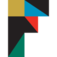
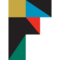
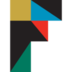
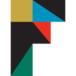
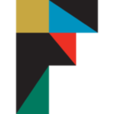
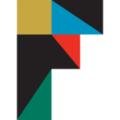
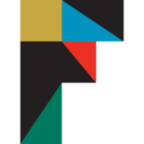
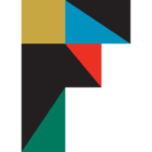
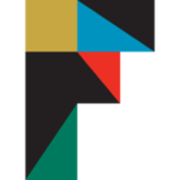
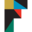

In [1]:
import requests
url = "https://fortune.com/2020/08/22/frances-frei-uber-new-book-company-culture/"

res = requests.get(url)
print(res.text)